In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Ecrire une fonction python rosenbrock(x) qui renvoie la valeur de la fonction de Rosenbrock, qui est une fonction de 2 variables réelles `a valeurs dans R, r(x) = (1 − x1)^2 + 100(x2 − (x1)^2)2
def rosenbrock(x1, x2):
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

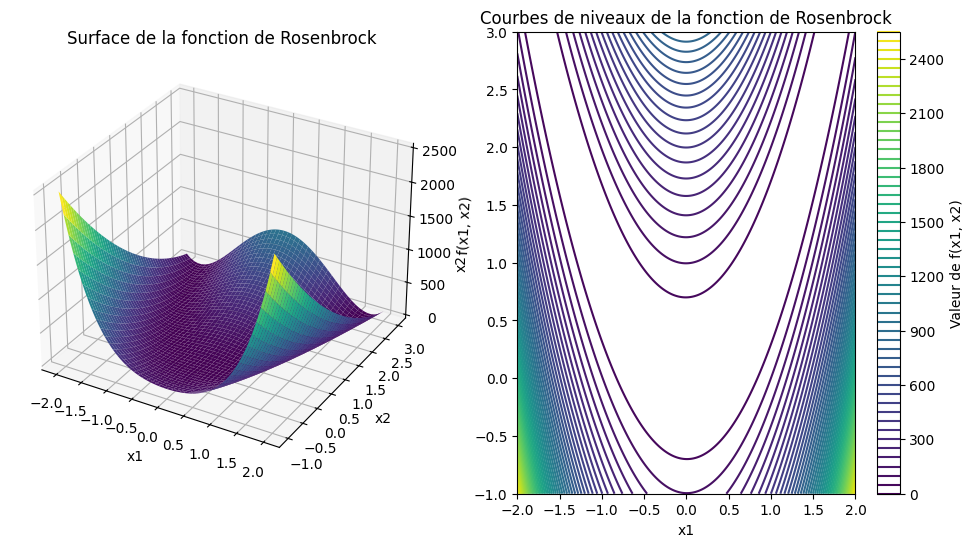

In [3]:
# Création de la grille pour x1 et x2
x1_vals = np.linspace(-2, 2, 400)  # Tester différentes plages de valeurs pour zoomer
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = rosenbrock(X1, X2)

# 1. Tracé 3D de la surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_title('Surface de la fonction de Rosenbrock')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# 2. Tracé des courbes de niveaux
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, Z, levels=50, cmap='viridis')
ax2.set_title("Courbes de niveaux de la fonction de Rosenbrock")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
fig.colorbar(contour, ax=ax2, label="Valeur de f(x1, x2)")

plt.show()

In [4]:
def gradient_rosenbrock(x1, x2):
    df_dx1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

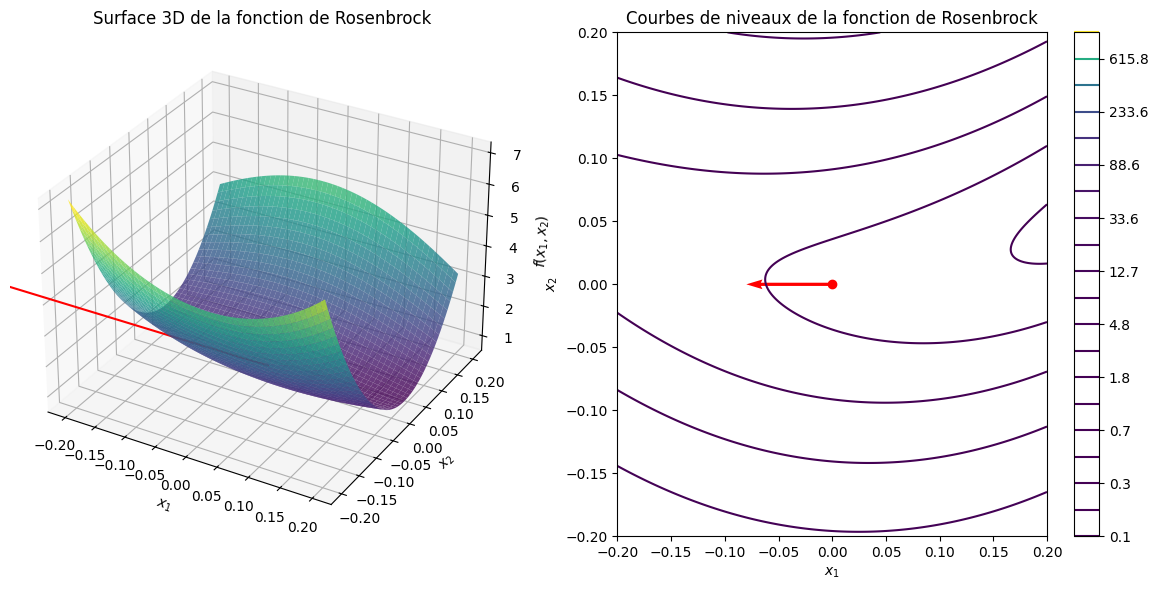

In [5]:
# Tracer le gradient en (0,0)
# Génération de la grille pour les graphiques
x1_vals = np.linspace(-0.2, 0.2, 400)
x2_vals = np.linspace(-0.2, 0.2, 400)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
f_values = rosenbrock(x1_grid, x2_grid)

# Point x0 = (0, 0)
x0 = np.array([0, 0])
grad_x0 = gradient_rosenbrock(x0[0], x0[1])

# 1. Tracé 3D de la fonction de Rosenbrock
fig = plt.figure(figsize=(12, 6))

# Graphique 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1_grid, x2_grid, f_values, cmap='viridis', alpha=0.8)
ax1.quiver(x0[0], x0[1], rosenbrock(x0[0], x0[1]), grad_x0[0], grad_x0[1], 0, color='r', length=0.5)
ax1.set_title("Surface 3D de la fonction de Rosenbrock")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')

# 2. Courbes de niveaux de la fonction de Rosenbrock
ax2 = fig.add_subplot(122)
contour = ax2.contour(x1_grid, x2_grid, f_values, levels=np.logspace(-1, 3, 20), cmap='viridis')
ax2.quiver(x0[0], x0[1], grad_x0[0], grad_x0[1], color='r', scale=10)
ax2.plot(x0[0], x0[1], 'ro')  # Point (0, 0)
ax2.set_title("Courbes de niveaux de la fonction de Rosenbrock")
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
plt.colorbar(contour, ax=ax2, orientation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
#5 
def gradient_tangente(x1, x2, x0):
    # courbe
    fig  = plt.figure(figsize=(12, 6))
    fig1 = fig.add_subplot(121, projection='3d')
    x1_vals, x2_vals = np.linspace(-3, 3, 400), np.linspace(-3, 3, 400)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
    z = rosenbrock(x1_grid, x2_grid)
    fig1.plot_surface(x1_grid, x2_grid, z, cmap="viridis", color='r', alpha=0.8)
    # tangente
    x3 = np.linspace(-3, 3, 400)
    fig_tg = gradient_rosenbrock(x0[0], x0[1]) * ([x1, x2] - x0) + rosenbrock(x0[0], x0[1]) 
    